In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
!pip install scikit-learn
!pip install pandas
!pip install emoji
!pip install num2words
!pip install nltk
!pip install matplotlib
!pip install wordcloud
!pip install ipynb
!pip install seaborn
!pip install unidecode
!pip install python-docx
import docx

In [ ]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import emoji
from num2words import num2words
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from matplotlib import colors
import pandas as pd
from ipynb.fs.full.preprocessor_class import Preprocessor
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train_data = pd.read_csv('data/shuffled_train_data.csv',index_col=None)
train_labels = pd.read_csv('data/shuffled_train_labels.csv',index_col=None)

test_data = pd.read_csv('data/test_data.csv',index_col=None)
test_labels = pd.read_csv('data/test_labels.csv',index_col=None)

train_data_plot = pd.read_csv('data/train_data_plot.csv',index_col=None)
test_data_plot = pd.read_csv('data/test_data_plot.csv',index_col=None)

train_data.shape

(2100, 1)

In [ ]:
preprocessor = Preprocessor(set(stopwords.words('romanian')),None, None, True, True, True, True, False, True, True, True, True, False, False)

preprocessed_data = pd.DataFrame(columns=['text'])

preprocessed_train_data = pd.DataFrame(columns=['text'])
preprocessed_test_data = pd.DataFrame(columns=['text'])

preprocessed_train_data['text'] = train_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)
preprocessed_test_data['text'] = test_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)

In [ ]:
preprocessed_test_data['text'] = preprocessed_test_data['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_test_data

,text
0,mare durere fizica simtita clasa ten stomatolo...
1,petitie asf impotriva speculei asiguratorilor ...
2,ride sharing plecat proteste redditori masini ...
3,apasa trimite refugiat sprit ten salvati gold ...
4,politia datoria scurt depus plangere politie m...
...,...
1320,sfat buna neboie sfat facut doza vaccin contra...
1321,boli mintale soferii tir dn1 locuit an jumatat...
1322,freelancer gasesc clienti gasesc client job fr...
1323,furata cunostinta spune probe suficiente furat...


In [ ]:
preprocessed_train_data['text'] = preprocessed_train_data['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_train_data

,text
0,rant ajuns cumparam originalul postare tip imp...
1,true grit secretul succesului evident ideile c...
2,experiente schimbat mentalitatea buna experien...
3,subreddit trebui numeasca r depresie casual ti...
4,ticalosilor entr acte unchiul scrie decat marc...
...,...
2095,mersul sala eticheta mno inceput merg sala tov...
2096,maine sala controla emotiile long story short ...
2097,stie gasesc granita italiana intors sicilia ma...
2098,somn permanenta stiu fac efectiv somn momentul...


In [ ]:
best_f1 = 0
chosen_parameters = {}
data =[]
for vocab in [1000,3000,5000]:
  for ij in range(1,4):
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
      for gamma in ['scale', 'auto']:
        for c in [1, 100, 1000]:
            #initiate the TfidfVectorizer
            sm = SMOTE(random_state=42)

            tfidf_vectorizer = TfidfVectorizer(max_features = vocab, ngram_range = (1,ij))
            train_tfidf = tfidf_vectorizer.fit_transform(preprocessed_train_data['text'])
            test_tfidf = tfidf_vectorizer.transform(preprocessed_test_data['text'])

            X_res, y_res = sm.fit_resample(train_tfidf, train_labels['label']) # Use tfidf data for SMOTE

            model = SVC(C = c, kernel = kernel, gamma = gamma)

            model.fit(X_res, y_res)
            predictions = model.predict(test_tfidf)
            f1 = metrics.f1_score(test_labels['label'], predictions, average = 'macro')

            print('max_features: {} n_gram: {}  kernel: {}  gamma: {}  C: {}  f1: {}'.format(vocab, (1, ij), kernel, gamma, c, f1))
            data.append({
              "max_features": vocab,
              "kernel": kernel,
              "gamma": gamma,
              "C": c,
              "n_gram":  (1, ij),
              "f1": f1
            })
            if f1 > best_f1:
                best_f1 = f1
                chosen_parameters["max_features"] = vocab
                chosen_parameters["n_gram"] = (1, ij)
                chosen_parameters["kernel"] = kernel
                chosen_parameters["gamma"] = gamma
                chosen_parameters["C"] = c

print(best_f1)
print(chosen_parameters)

max_features: 1000 n_gram: (1, 1)  kernel: linear  gamma: scale  C: 1  f1: 0.43767857380164515
max_features: 1000 n_gram: (1, 1)  kernel: linear  gamma: scale  C: 100  f1: 0.3722669735327963
max_features: 1000 n_gram: (1, 1)  kernel: linear  gamma: scale  C: 1000  f1: 0.39441543371047283
max_features: 1000 n_gram: (1, 1)  kernel: linear  gamma: auto  C: 1  f1: 0.43767857380164515
max_features: 1000 n_gram: (1, 1)  kernel: linear  gamma: auto  C: 100  f1: 0.3722669735327963
max_features: 1000 n_gram: (1, 1)  kernel: linear  gamma: auto  C: 1000  f1: 0.39441543371047283
max_features: 1000 n_gram: (1, 1)  kernel: poly  gamma: scale  C: 1  f1: 0.40115401747161544
max_features: 1000 n_gram: (1, 1)  kernel: poly  gamma: scale  C: 100  f1: 0.35051953729580415
max_features: 1000 n_gram: (1, 1)  kernel: poly  gamma: scale  C: 1000  f1: 0.34648842386462464
max_features: 1000 n_gram: (1, 1)  kernel: poly  gamma: auto  C: 1  f1: 0.1742275329651799
max_features: 1000 n_gram: (1, 1)  kernel: poly  g

In [ ]:
#generate classification report for best parameters
sm = SMOTE(random_state=42)

tfidf = TfidfVectorizer(max_features = chosen_parameters["max_features"], ngram_range = chosen_parameters["n_gram"])

X_train_tfidf = tfidf.fit_transform(preprocessed_train_data["text"]).toarray()
X_test_tfidf = tfidf.transform(preprocessed_test_data["text"]).toarray()
model = SVC(C = chosen_parameters["C"], kernel = chosen_parameters["kernel"], gamma = chosen_parameters["gamma"])
X_res, y_res = sm.fit_resample(X_train_tfidf, train_labels['label']) # Use tfidf data for SMOTE

model.fit(X_res, y_res)
predictions = model.predict(X_test_tfidf)
f1 = metrics.f1_score(test_labels['label'], predictions, average = 'macro')


print("F1 Score:", f1)
print(classification_report(test_labels['label'], predictions))

F1 Score: 0.4580042639982999
                     precision    recall  f1-score   support

      no_depression       0.84      0.73      0.78      1000
possible_depression       0.30      0.38      0.33       250
    true_depression       0.21      0.36      0.26        75

           accuracy                           0.64      1325
          macro avg       0.45      0.49      0.46      1325
       weighted avg       0.70      0.64      0.67      1325



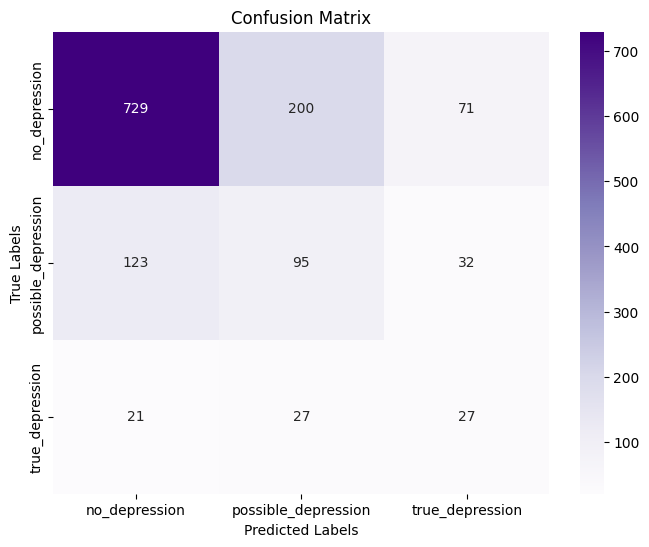

In [ ]:
#generate confusion matrix for best parameters

conf_matrix = confusion_matrix(test_labels['label'], predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels = ['no_depression', 'possible_depression', 'true_depression'], yticklabels = ['no_depression', 'possible_depression', 'true_depression'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
doc = docx.Document()

doc.add_heading('Hiperparametrization', 0)

# Table data in a form of list
# data = (
#     (1, 'Geek 1'),
#     (2, 'Geek 2'),
#     (3, 'Geek 3')
# )

# Creating a table object
table = doc.add_table(rows=1, cols=6)
  # max_features: 1000 n_gram: (1, 1)  n_estimators: 10  max_depth: 1  learning_rate: 0.001  f1: 0.38419503322527343

# Adding heading in the 1st row of the table
row = table.rows[0].cells
row[0].text = 'max_features'
row[1].text = 'n_gram'
row[2].text = 'kernel'
row[3].text = 'gamma'
row[4].text = 'C'
row[5].text = 'f1'

# Adding data from the list to the table
for elem in data:
    # Adding a row and then adding data in it.
    row = table.add_row().cells
    # Converting id to string as table can only take string input
    row[0].text = str(elem['max_features'])
    row[1].text = str(elem['n_gram'])
    row[2].text = str(elem['kernel'])
    row[3].text = str(elem['gamma'])
    row[4].text = str(elem['C'])
    row[5].text = str(round(elem['f1'],4))

# Now save the document to a location
doc.save('hiperparam_svmoversampling.docx')